# 第三章习题3  Titanic 数据集上的分类

##  Prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#train = pd.read_csv("../input/titanic/train.csv")
train = pd.read_csv("datasets/titanic/train.csv")

*Take a glasp of dataset*

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_val = pd.read_csv('datasets/titanic/test.csv')

In [5]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*Check if there are repeated names*

In [7]:
name_count = train["Name"].value_counts().values

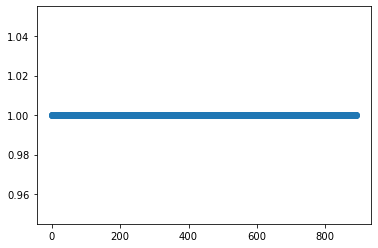

In [8]:
plt.scatter(range(len(name_count)), name_count)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.columns[train.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [15]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Van der hoef, Mr. Wyckoff",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Show digital data in figures*

In [18]:
train_label = train["Survived"]
y_train = train_label.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13c15ab978>,
      dtype=object)

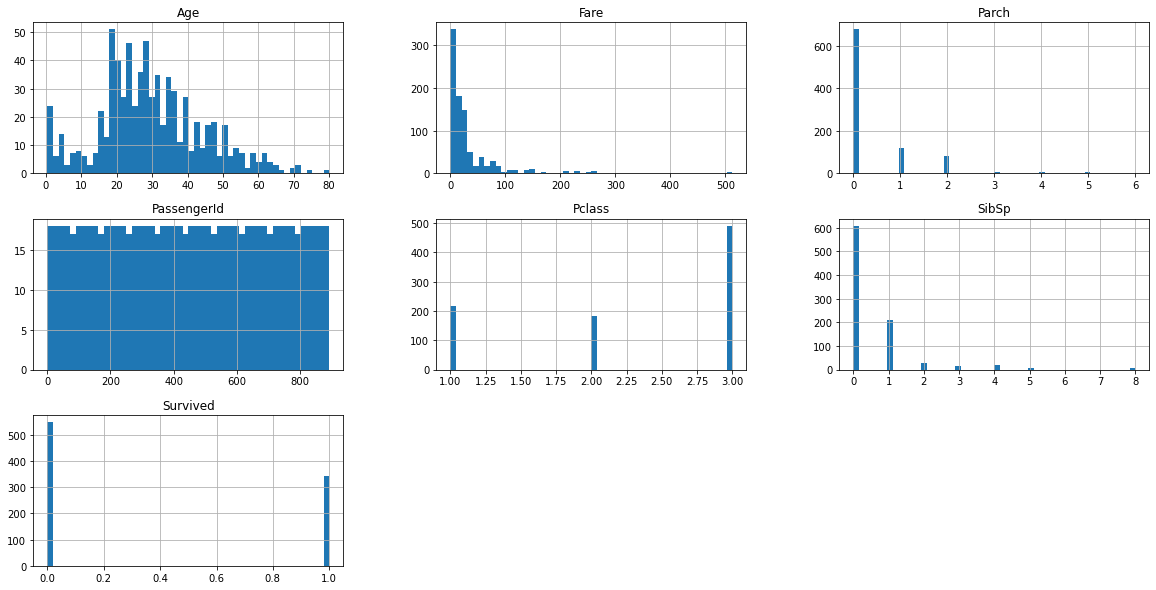

In [19]:
train.hist(bins=50,figsize=(20,10))

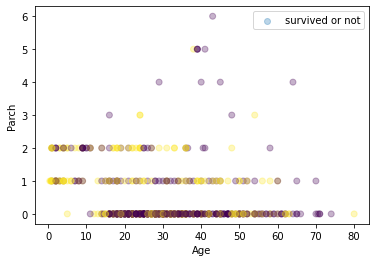

In [20]:
plt.scatter(train["Age"], train["Parch"], c=train_label, alpha=0.3,label='survived or not')
plt.xlabel("Age")
plt.ylabel("Parch")
plt.legend()

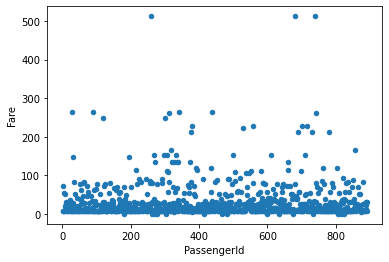

In [21]:
train.plot(kind='scatter',x='PassengerId',y='Fare')

In [22]:
train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
train[['Survived', 'Embarked']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


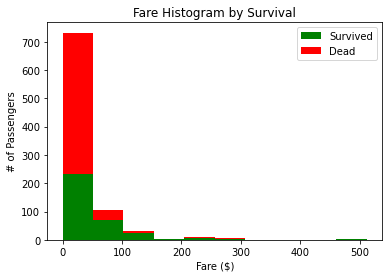

In [24]:
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

*Clean the data*

In [25]:
train_feat = train.drop("Survived", axis=1)
#train_feat.info()

In [26]:
data_cleaner = [train_feat, data_val]

In [27]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [28]:
exclude_index = ['PassengerId', 'Ticket', 'Cabin']
train_feat.drop(exclude_index, axis=1, inplace=True)

In [29]:
train_feat.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
train_feat['Name'].sample(10)

640                           Jensen, Mr. Hans Peder
224                     Hoyt, Mr. Frederick Maxfield
703                            Gallagher, Mr. Martin
118                         Baxter, Mr. Quigg Edmond
247                  Hamalainen, Mrs. William (Anna)
258                                 Ward, Miss. Anna
88                        Fortune, Miss. Mabel Helen
811                                Lester, Mr. James
589                              Murdlin, Mr. Joseph
133    Weisz, Mrs. Leopold (Mathilde Francoise Pede)
Name: Name, dtype: object

In [32]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    #dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

/home/ligy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
train_feat[['Alone', 'FamilySize', 'SibSp', 'Parch', 'Title']].sample(10)

,Alone,FamilySize,SibSp,Parch,Title
197,0,2,0,1,Mr
364,0,2,1,0,Mr
816,1,1,0,0,Miss
464,1,1,0,0,Mr
383,0,2,1,0,Mrs
311,0,5,2,2,Miss
534,1,1,0,0,Miss
257,1,1,0,0,Miss
244,1,1,0,0,Mr
768,0,2,1,0,Mr


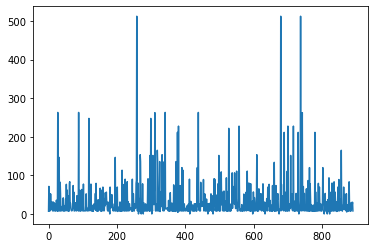

In [34]:
train_feat['Fare'].plot()

In [35]:
title_name = train_feat['Title'].value_counts() < 10
#title_name['Mr']
title_name

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Sir              True
Lady             True
Capt             True
Mme              True
Jonkheer         True
Ms               True
Don              True
Name: Title, dtype: bool

In [36]:
train_feat['Title'] = train_feat['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [37]:
train_feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [39]:
drop_columns = ['Name', 'Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin']
train_feat.drop(drop_columns, axis=1, inplace=True)
data_val.drop(drop_columns, axis=1, inplace=True)

In [40]:
data_val.drop(exclude_index, axis=1, inplace=True)

In [41]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    int64  
 3   Parch          891 non-null    int64  
 4   Fare           891 non-null    float64
 5   FamilySize     891 non-null    int64  
 6   Alone          891 non-null    int64  
 7   Sex_Code       891 non-null    int64  
 8   Embarked_Code  891 non-null    int64  
 9   Title_Code     891 non-null    int64  
 10  AgeBin_Code    891 non-null    int64  
 11  FareBin_Code   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [42]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    float64
 5   FamilySize     418 non-null    int64  
 6   Alone          418 non-null    int64  
 7   Sex_Code       418 non-null    int64  
 8   Embarked_Code  418 non-null    int64  
 9   Title_Code     418 non-null    int64  
 10  AgeBin_Code    418 non-null    int64  
 11  FareBin_Code   418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


In [53]:
a = train_feat.columns == data_val.columns
a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

*split train and test*

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_feat.values,
                                                    train['Survived'].values,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 12), (712,), (179, 12), (179,))

*visualizatioins*

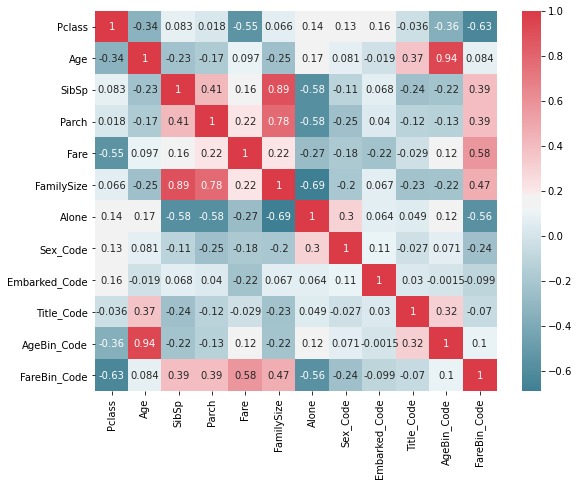

In [69]:
import seaborn as sns
plt.figure(figsize=(9,7))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(train_feat.corr(), annot=True, cmap=colormap)

*model data*

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier()
alg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
for feat, score in zip(train_feat.columns, alg.feature_importances_):
    print(feat,": ", score)

Pclass :  0.07362133198487793
Age :  0.19306189033922244
SibSp :  0.029871101278594728
Parch :  0.02156865667555178
Fare :  0.216357299755101
FamilySize :  0.04577090431098889
Alone :  0.011453176772652524
Sex_Code :  0.18862694667826468
Embarked_Code :  0.030548265309156157
Title_Code :  0.11315678064593618
AgeBin_Code :  0.037747804224482366
FareBin_Code :  0.03821584202517139


In [114]:
b = np.c_[train_feat.columns, alg.feature_importances_]
sorted(b, key=lambda x:x[1],reverse=True )

[array(['Fare', 0.216357299755101], dtype=object),
 array(['Age', 0.19306189033922244], dtype=object),
 array(['Sex_Code', 0.18862694667826468], dtype=object),
 array(['Title_Code', 0.11315678064593618], dtype=object),
 array(['Pclass', 0.07362133198487793], dtype=object),
 array(['FamilySize', 0.04577090431098889], dtype=object),
 array(['FareBin_Code', 0.03821584202517139], dtype=object),
 array(['AgeBin_Code', 0.037747804224482366], dtype=object),
 array(['Embarked_Code', 0.030548265309156157], dtype=object),
 array(['SibSp', 0.029871101278594728], dtype=object),
 array(['Parch', 0.02156865667555178], dtype=object),
 array(['Alone', 0.011453176772652524], dtype=object)]

In [76]:
alg.score(X_train, y_train)

0.9817415730337079

In [77]:
alg.score(X_test, y_test)

0.8044692737430168

*overfit! evaluate modes by corss-validating*

## Appendix

*change ND to 1D*

In [45]:
#a = move_image_one_pixel(X_train[0],'up').reshape(28,28)
a = np.random.rand(3,4,5,2)
b = a.ravel()#view of a, not copy
print(b.shape, a.ravel().shape)
c = a.reshape(-1)
d = a.flatten()
print(c.shape, d.shape, a.shape)
np.prod(a.shape)

(120,) (120,)
(120,) (120,) (3, 4, 5, 2)


120

*Extend array*

In [46]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [47]:
b = np.append(a, np.arange(6).reshape(2, 3), axis=0)
b

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [48]:
np.concatenate((a, a, b), axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])